In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px


In [76]:
data_2016 = pd.read_csv("fraternity_sorority_data_2016.csv")
data_2017 = pd.read_csv("fraternity_sorority_data_2017.csv")
data_2018 = pd.read_csv("fraternity_sorority_data_2018.csv")
data_2019 = pd.read_csv("fraternity_sorority_data_2019.csv")
data_2020 = pd.read_csv("fraternity_sorority_data_2020.csv")
data_2021 = pd.read_csv("fraternity_sorority_data_2021.csv")
data_2022 = pd.read_csv("fraternity_sorority_data_2022.csv")
data_2023 = pd.read_csv("fraternity_sorority_data_2023.csv")

In [77]:
frats_to_keep = data_2016['Chapter']
frats_to_keep

0         Alpha Delta Phi
1                 Chi Psi
2         Phi Delta Theta
3            Pi Kappa Phi
4           Beta Theta Pi
5               Sigma Chi
6       Sigma Phi Epsilon
7         Phi Gamma Delta
8               Theta Chi
9             Kappa Alpha
10               Zeta Psi
11         Pi Kappa Alpha
12       Alpha Epsilon Pi
13        Delta Tau Delta
14        Alpha Sigma Phi
15                 Acacia
16            Psi Upsilon
17              Delta Chi
18    Sigma Alpha Epsilon
19          Phi Kappa Psi
20          Phi Kappa Tau
21      Tau Kappa Epsilon
22        Phi Kappa Sigma
23        Phi Kappa Theta
24        Alpha Tau Omega
25               Theta Xi
26          Delta Upsilon
27            Kappa Sigma
28        Theta Delta Chi
29       Lambda Chi Alpha
30         Sigma Alpha Mu
31          Zeta Beta Tau
32               Sigma Nu
Name: Chapter, dtype: object

In [78]:
data_2016 = data_2016[['Year', 'Chapter', '# Memb', "Dean's List"]].rename(columns={'Chapter': 'Fraternity/Sorority', '# Memb': 'Members', "Dean's List": 'Dean List'})
data_2017 = data_2017[['Year', 'Fraternity', 'Members Total', "Dean's List"]].rename(columns={'Fraternity': 'Fraternity/Sorority', 'Members Total': 'Members', "Dean's List": 'Dean List'})
data_2018 = data_2018[['Year', 'Fraternity/Sorority', 'Total Members', "Total Dean's List"]].rename(columns={'Total Members': 'Members', "Total Dean's List": 'Dean List'})
data_2019 = data_2019[['Year', 'Fraternity/Sorority', 'Total Chapter Members', "Total Chapter Dean's"]].rename(columns={'Total Chapter Members': 'Members', "Total Chapter Dean's": 'Dean List'})
data_2020 = data_2020[['Year', 'Fraternity/Sorority', 'Chapter Size', "Dean's List #"]].rename(columns={'Chapter Size': 'Members', "Dean's List #": 'Dean List'})
data_2021 = data_2021[['Year', 'Fraternity/Sorority', 'Chapter Size', "Dean's List #"]].rename(columns={'Chapter Size': 'Members', "Dean's List #": 'Dean List'})
data_2022 = data_2022[['Year', 'Fraternity/Sorority', 'Chapter Size', "Dean's List #"]].rename(columns={'Chapter Size': 'Members', "Dean's List #": 'Dean List'})
data_2023 = data_2023[['Year', 'Fraternity/Sorority', 'Chapter Size', "Dean's List #"]].rename(columns={'Chapter Size': 'Members', "Dean's List #": 'Dean List'})

combined_data = pd.concat([data_2016, data_2017, data_2018, data_2019, data_2020, data_2021, data_2022, data_2023], ignore_index=True)
combined_data["Dean's List Percentage"] = combined_data['Dean List'] / combined_data['Members']
filtered_data = combined_data[combined_data['Fraternity/Sorority'].isin(frats_to_keep)]


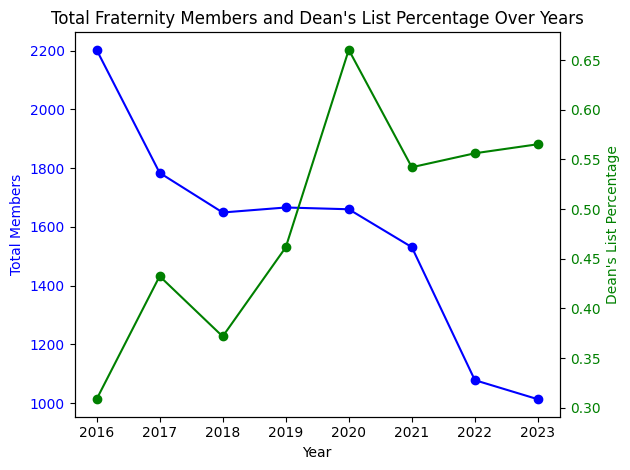

In [148]:
members_total = filtered_data.groupby('Year').sum().reset_index()
deans_list_avg = combined_data.groupby("Year")["Dean's List Percentage"].mean().reset_index()


fig, ax1 = plt.subplots()

# Plotting the total number of members
ax1.plot(members_total['Year'], members_total['Members'], color='b', marker='o', label='Total Members')
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Members', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Creating a second y-axis
ax2 = ax1.twinx()
ax2.plot(deans_list_avg['Year'], deans_list_avg["Dean's List Percentage"], color='g', marker='o', label="Dean's List Percentage")
ax2.set_ylabel("Dean's List Percentage", color='g')
ax2.tick_params(axis='y', labelcolor='g')

# Adding title
plt.title("Total Fraternity Members and Dean's List Percentage Over Years")

# Display the graph
fig.tight_layout()  # Adjust layout to make room for the second y-axis
plt.show()



Text(0, 0.5, 'Percentge %')

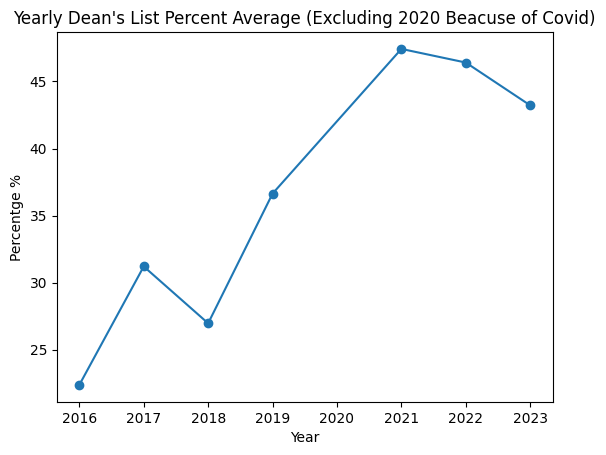

In [100]:
gpa_averages_no_2020 = gpa_averages[gpa_averages['Year'] != 2020]
plt.plot(gpa_averages_no_2020['Year'], gpa_averages_no_2020['Dean List'], marker = 'o')
plt.title("Yearly Dean's List Percent Average (Excluding 2020 Beacuse of Covid)")
plt.xlabel("Year")
plt.ylabel("Percentge %")


Text(0, 0.5, "Dean's List")

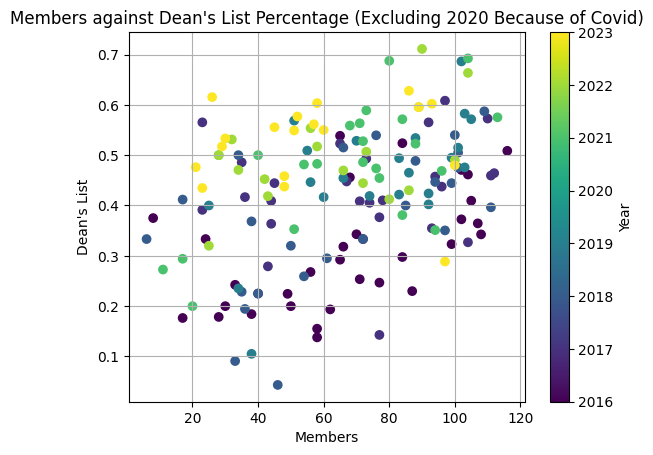

In [102]:
filtered_data_no_2020 = filtered_data[filtered_data['Year'] != 2020]

scatter = plt.scatter(filtered_data_no_2020['Members'], filtered_data_no_2020["Dean's List Percentage"], c = filtered_data_no_2020['Year'])
plt.colorbar(scatter, label='Year')
plt.title("Members against Dean's List Percentage (Excluding 2020 Because of Covid)")
plt.xlabel("Members")
plt.grid(True)
plt.ylabel("Dean's List")

In [134]:
sorted_data = filtered_data.sort_values(by="Dean's List Percentage", ascending=True)
sorted_data

,Year,Fraternity/Sorority,Members,Dean List,Dean's List Percentage
81,2018,Lambda Chi Alpha,46.0,2.0,0.043478
80,2018,Phi Kappa Tau,33.0,3.0,0.090909
102,2019,Kappa Alpha,38.0,4.0,0.105263
26,2016,Delta Upsilon,58.0,8.0,0.137931
54,2017,Sigma Alpha Epsilon,77.0,11.0,0.142857
...,...,...,...,...,...
129,2020,Theta Xi,61.0,44.0,0.721311
108,2020,Beta Theta Pi,107.0,79.0,0.738318
126,2020,Sigma Phi Epsilon,84.0,64.0,0.761905
116,2020,Phi Gamma Delta,100.0,78.0,0.780000


In [139]:
combined_data_2020_on = combined_data[combined_data['Year'].isin([2020, 2021, 2022, 2023])]
combined_data_2020_on = combined_data_2020_on.groupby("Year").sum().reset_index()
combined_data_2020_on

,Year,Fraternity/Sorority,Members,Dean List,Dean's List Percentage,Deans List Perc
0,2020,Alpha Delta PhiAlpha Phi AlphaAlpha Sigma PhiB...,4115.0,2867.0,32.353451,32.353451
1,2021,Alpha Delta PhiAlpha Sigma PhiBeta Theta PiChi...,3450.0,1992.0,21.682349,21.682349
2,2022,Alpha Delta PhiAlpha Sigma PhiChi PsiDelta Kap...,2751.0,1578.0,18.907843,18.907843
3,2023,Alpha Delta PhiAlpha Sigma PhiBeta Theta PiChi...,2762.0,1599.0,20.912684,20.912684


In [140]:
uw_undergrad_enrollement = pd.read_csv("uw_undergraduate_enrollment_2019_2024.csv")
uw_undergrad_enrollement


,Year,Undergraduate Enrollment
0,2020,32244
1,2021,36201
2,2022,36213
3,2023,36255


In [141]:
combined_data_2020_on

,Year,Fraternity/Sorority,Members,Dean List,Dean's List Percentage,Deans List Perc
0,2020,Alpha Delta PhiAlpha Phi AlphaAlpha Sigma PhiB...,4115.0,2867.0,32.353451,32.353451
1,2021,Alpha Delta PhiAlpha Sigma PhiBeta Theta PiChi...,3450.0,1992.0,21.682349,21.682349
2,2022,Alpha Delta PhiAlpha Sigma PhiChi PsiDelta Kap...,2751.0,1578.0,18.907843,18.907843
3,2023,Alpha Delta PhiAlpha Sigma PhiBeta Theta PiChi...,2762.0,1599.0,20.912684,20.912684


Text(0.5, 1.0, 'Greek Percentage')

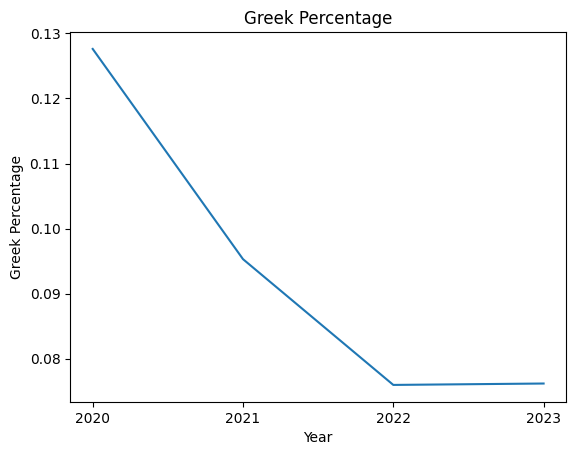

In [147]:
combined_data_2020_on_new = pd.merge(combined_data_2020_on, uw_undergrad_enrollement, on="Year", how="outer")
combined_data_2020_on_new['Greek Percentage'] = combined_data_2020_on_new['Members'] / combined_data_2020_on_new['Undergraduate Enrollment']
plt.plot(combined_data_2020_on_new['Year'], combined_data_2020_on_new['Greek Percentage'])
plt.xlabel("Year")
plt.ylabel("Greek Percentage")
plt.xticks(combined_data_2020_on['Year'])
plt.title("Greek Percentage")

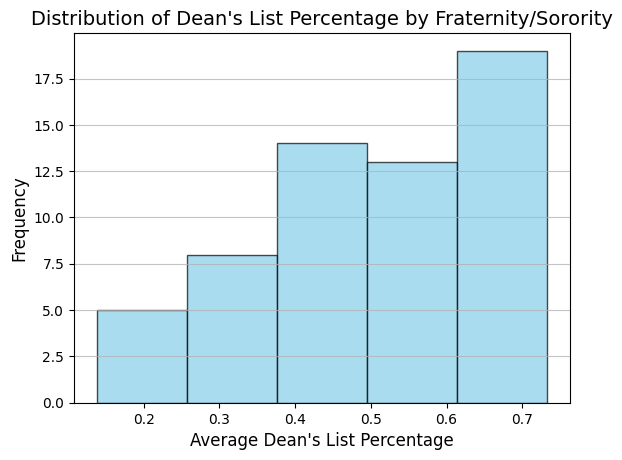

In [210]:
houses = combined_data.groupby("Fraternity/Sorority").mean().reset_index()
houses = houses.drop(columns=["Year"])
houses

plt.hist(houses["Dean's List Percentage"], bins=5, color='skyblue', edgecolor='black', alpha=0.7)
plt.title("Distribution of Dean's List Percentage by Fraternity/Sorority", fontsize=14)
plt.xlabel("Average Dean's List Percentage", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.grid(axis='y', alpha=0.75)


# Displaying the plot
plt.show()

In [224]:
combined_data[combined_data['Fraternity/Sorority'] == "Delta Delta Delta"]

,Year,Fraternity/Sorority,Members,Dean List,Dean's List Percentage,Deans List Perc
139,2020,Delta Delta Delta,127.0,108.0,0.850394,0.850394
184,2021,Delta Delta Delta,108.0,76.0,0.703704,0.703704
220,2022,Delta Delta Delta,106.0,75.0,0.707547,0.707547
256,2023,Delta Delta Delta,103.0,59.0,0.572816,0.572816


In [211]:
filtered_houses = houses[houses['Members'] > 20]


In [223]:
filtered_houses[filtered_houses['Fraternity/Sorority'] == "Delta Delta Delta"]

,Fraternity/Sorority,Members,Dean List,Dean's List Percentage,Deans List Perc
17,Delta Delta Delta,111.0,79.5,0.708615,0.708615


In [222]:
fig = px.scatter(filtered_houses, 
                 x='Members', 
                 y="Dean's List Percentage",
                 title="Chapter Size vs. Dean's List Percentage",
                 labels={"Members": "Members", "Dean's List Percentage": "Average Dean's List Percentage", "Fraternity/Sorority": "Chapter Name"},
                 text='Fraternity/Sorority')

# Adding hover information and updating marker and text properties
fig.update_traces(marker=dict(size=4, color='skyblue', line=dict(width=1, color='DarkSlateGrey')),
                  textfont=dict(size=10),  # Smaller text
                  hovertemplate='<b>%{text}</b><br>Members: %{x}<br>Dean\'s List Percentage: %{y}<extra></extra>')

# Displaying the plot
fig.show()
